# Content:
1. [Data modeling](#1.-Data-modeling)
2. [Matrix inverse](#2.-Matrix-inverse)
3. [Vandermonde matrix](#3.-Vandermonde-matrix)
4. [Polynomial fitting](#4.-Polynomial-fitting)
5. [Goodness of a fit: Error metrics](#5.-Goodness-of-a-fit:-Error-metrics)
6. [Weighted least squares](#6.-Weighted-least-squares)
7. [Multiple least squares: Higher dimensional fit](#7.-Multiple-least-squares:-Higher-dimensional-fit)

## 1. Data modeling

![board%20work%20-19.jpg](boardwork/board%20work%20-19.jpg)
![board%20work%20-20.jpg](boardwork/board%20work%20-20.jpg)
![board%20work%20-21.jpg](boardwork/board%20work%20-21.jpg)
![board%20work%20-22.jpg](boardwork/board%20work%20-22.jpg)
![board%20work%20-23.jpg](boardwork/board%20work%20-23.jpg)
![board%20work%20-24.jpg](boardwork/board%20work%20-24.jpg)

## 2. Matrix inverse

Let's use Numpy's implementation to determine the matrix inverse. You can check if the inverse has come out as expected by multiplying with the given matrix. 

In [1]:
import numpy as np 

A = np.array([[1,2],[3,4]]) 
Ainv = np.linalg.inv(A)

print(A,'\n') 
print(Ainv,'\n')
I=np.dot(A,Ainv)
print(I)

[[1 2]
 [3 4]] 

[[-2.   1. ]
 [ 1.5 -0.5]] 

[[  1.00000000e+00   1.11022302e-16]
 [  0.00000000e+00   1.00000000e+00]]


## 3. Vandermonde matrix

Numpy has a function to calculate the Vandermonde matrix. 

In [2]:
import numpy as np 

x = np.array([1, 2, 3, 5])

# To fit a straight-line, polynomial of degree 1
D=3

np.vander(x, D+1, increasing=True) #NOTE: argument is D+1

array([[  1,   1,   1,   1],
       [  1,   2,   4,   8],
       [  1,   3,   9,  27],
       [  1,   5,  25, 125]])

In [3]:
D=3
np.vander(x, D+1) #Note the order

array([[  1,   1,   1,   1],
       [  8,   4,   2,   1],
       [ 27,   9,   3,   1],
       [125,  25,   5,   1]])

In [4]:
D=4
np.vander(x, D+1, increasing=True)

array([[  1,   1,   1,   1,   1],
       [  1,   2,   4,   8,  16],
       [  1,   3,   9,  27,  81],
       [  1,   5,  25, 125, 625]])

## 4. Polynomial fitting

In [5]:
def polyfit(x,y,D):
    '''
        Fits a given set of data x,y to a polynomial of degree D
    '''
    import numpy as np 
    
    #N=x.shape()
    
    X=np.vander(x, D+1, increasing=True)
    XT=np.transpose(X)
    
    A=np.matmul(XT,X)
    Ainv=np.linalg.inv(A)
    
    b=np.matmul(XT,y)
    
    a=np.matmul(Ainv,b)
    
    return(a)

#=== Let's fit a data from a parabola to a polynomial of degree 'D'

x_i=-2.0
x_f=2.0
dx=0.5
x=np.arange(x_i, x_f+dx, dx, float) # start, stop, step, dtype

print(x)

y=-0.4*x**2

D=3  # Degree = 3
a=polyfit(x,y,D)

for i in range(D+1):
    print(i,a[i])

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2. ]
0 4.4408920985e-16
1 -2.03104773304e-16
2 -0.4
3 5.88131613494e-17


Only the quadratic term survives, all other coefficients are zero!

To evaluate the polynomial, i.e., the estimated values of y, one can write another function, called polyval.

In [6]:
def polyval(a,x):
    '''
        Determines the value of the polynomial using x and the coefficient vector a
    '''
    import numpy as np
    D=a.shape[0]
    N=x.shape

    y=np.zeros(N)
    for i in range(D):
        y=y+a[i]*x**i
    
    return(y)

yfit=polyval(a,x)
print(yfit)

[ -1.60000000e+00  -9.00000000e-01  -4.00000000e-01  -1.00000000e-01
   4.44089210e-16  -1.00000000e-01  -4.00000000e-01  -9.00000000e-01
  -1.60000000e+00]


## 5. Goodness of a fit: Error metrics 

In [7]:
import numpy as np

#=== Read the data from a file
myfile=open('data/fit_01.csv','r')

x=np.array([])
y=np.array([])

iline=0
for line in myfile:
    if iline > 0:            # i == 0 corresponds to the heading
        str=line.split(',')  # csv, comma separated values
        valx=eval(str[0])
        valy=eval(str[1])
        x=np.append(x,[valx])
        y=np.append(y,[valy])
        
    iline=iline+1
myfile.close() 
    
#=== Let's use the functions polyval and polyfit described above

D=3
N=x.shape[0]

print('#    i','     a_i')
a=polyfit(x,y,D)
for i in range(D+1):
    print('{:6d}{:15.8f}'.format(i,a[i]))

yfit=polyval(a,x)

err=y-yfit
abs_err = np.abs(y-yfit)

print('#    i','     x_i           y_i             y_i (fit)      error          |error|')
for i in range(N):
    print('{:6d}{:15.8f}{:15.8f}{:15.8f}{:15.8f}{:15.8f}'.format(i,x[i],y[i],yfit[i],err[i],abs_err[i]))

#    i      a_i
     0     3.68735902
     1     4.23907769
     2     1.63518064
     3    -0.36808270
#    i      x_i           y_i             y_i (fit)      error          |error|
     0     0.23000000     5.64000000     4.74436948     0.89563052     0.89563052
     1     1.01000000     7.83000000     9.25763929    -1.42763929     1.42763929
     2     2.29000000    17.04000000    17.54959667    -0.50959667     0.50959667
     3     2.87000000    21.38000000    20.62089216     0.75910784     0.75910784
     4     4.15000000    24.56000000    23.13331744     1.42668256     1.42668256
     5     5.36000000    16.21000000    16.70560536    -0.49560536     0.49560536
     6     5.51000000    14.57000000    15.11452357    -0.54452357     0.54452357
     7     6.36000000     0.78000000     2.09754188    -1.31754188     1.31754188
     8     6.84000000    -7.64000000    -8.60587544     0.96587544     0.96587544
     9     7.00000000   -12.52000000   -12.76761041     0.24761041     0.24761

In [8]:
#Mean absolute error
mae=np.mean(abs_err)
print("Mean absolute error: ", mae)

# Centralized error
cerr=err-np.mean(err)
var=np.mean(cerr**2)
std=np.sqrt(var)
print("Standard deviation: ", std)

# Standard deviation
std=np.std(err)
print("Standard deviation using numpy: ", std)

print('No. of data points, N: ', N)
print('Degree of the polynomial, D: ', D)

var=np.sum(cerr**2)/(N-D-1.0)
std=np.sqrt(var)
print("Standard deviation of polynomial fit [safe upper bound]: ", std)

Mean absolute error:  0.858981351628
Standard deviation:  0.947836379168
Standard deviation using numpy:  0.947836379168
No. of data points, N:  10
Degree of the polynomial, D:  3
Standard deviation of polynomial fit [safe upper bound]:  1.22365150382


In [9]:
my_rho = np.corrcoef(y, yfit)[0,1]
print(my_rho)

0.996698401163


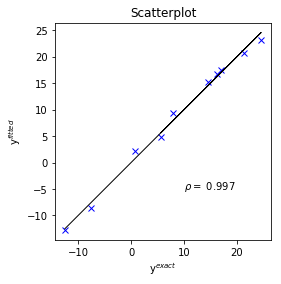

In [14]:
import numpy as np
import matplotlib.pyplot as plt

#plt.plot(x,y,'o',color='r',linewidth=1,label='y$^{exact}$')
fig = plt.figure()                        # comment if square plot is not needed
ax = fig.add_subplot(111)                 # comment if square plot is not needed
plt.plot(y,yfit,'x',color='b',linewidth=1)
ax.set_aspect('equal', adjustable='box')  # comment if square plot is not needed
plt.plot(y,y,'-',color='k',linewidth=1)


plt.text(10,-5, r'$\rho=$ {0:5.3f}'.format(my_rho), fontsize=10)

plt.legend()

plt.xlabel("y$^{exact}$")
plt.ylabel("y$^{fitted}$")
plt.title('Scatterplot')

#plt.savefig('test.png')  

#=== display
plt.show()

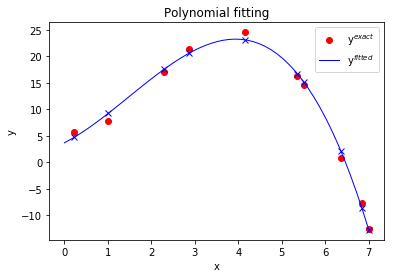

In [11]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(x,y,'o',color='r',linewidth=1,label='y$^{exact}$')
plt.plot(x,yfit,'x',color='b',linewidth=1)

x_min=0.0
x_max=7.0
x_grids=51
xgrids=np.linspace(x_min, x_max, x_grids)
ygridsfit=polyval(a,xgrids)

plt.plot(xgrids,ygridsfit,'-',color='b',linewidth=1,label='y$^{fitted}$')

plt.legend()

plt.xlabel("x")
plt.ylabel("y")
plt.title('Polynomial fitting')

#plt.savefig('test.png')  

#=== display
plt.show()

---
Homework-10: Use the data given in 'data/fit_01.csv' and perform least-squares regression using polynomials of degrees D=1,2,3,..,8. For each case, calculate the standard deviation for the polynomial fit. Comment on the polynomial which gives the lowest standard deviation.

---

## 6. Weighted least squares 

![board%20work%20-25.jpg](boardwork/board%20work%20-25.jpg)
![board%20work%20-26.jpg](boardwork/board%20work%20-26.jpg)

---
Homework-11: Use the data given in 'data/fit_02.csv' and perform weighted least-squares regression using a polynomials of degrees D=3. Column three of the file contains the standard deviation of each measured value of 'y'.

---

## 7. Multiple least squares: Higher dimensional fit 

![board%20work%20-27.jpg](boardwork/board%20work%20-27.jpg)